In [19]:
import pandas as pd 
import numpy as np
import seaborn as sns 
from matplotlib import pyplot as plt 

plt.style.use("fivethirtyeight")
sns.set_style("white")

%matplotlib inline

In [20]:
colors1 = ['#e6ccb2','#b08968','#7f5539'] 
colors2 = ['#ede0d4','#e6ccb2','#ddb892','#b08968','#7f5539','#9c6644','#dda15e']

In [21]:
data = pd.read_csv("/content/insurance.csv")

In [22]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [23]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [25]:
data.describe(include = "all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,1338,NaN,NaN,NaN,39.207,14.05,18,27,39,51,64
sex,1338,2,male,676,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bmi,1338,NaN,NaN,NaN,30.6634,6.09819,15.96,26.2963,30.4,34.6938,53.13
children,1338,NaN,NaN,NaN,1.09492,1.20549,0,0,1,2,5
smoker,1338,2,no,1064,NaN,NaN,NaN,NaN,NaN,NaN,NaN
region,1338,4,southeast,364,NaN,NaN,NaN,NaN,NaN,NaN,NaN
charges,1338,NaN,NaN,NaN,13270.4,12110,1121.87,4740.29,9382.03,16639.9,63770.4


In [26]:
data.shape

(1338, 7)

In [27]:
list(data.columns)

['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']

In [28]:
def cat_unmariated_analysis(feature):
  data_ = data[feature].value_counts().sort_values(ascending = True)
  plt.figure(figsize = (20,5),facecolor = "white")
  plt.subplot(1,2,1)
  plt.barh(y = data_.index,width = data_.values,
           linewidth = 1,color = colors2,
           edgecolor = "k",height = 0.7)
  
  
  sns.despine()
  ax = plt.subplot(1,2,2)
  ax.pie(x = data_.values,labels = data_.index,
         radius = 1.2,shadow  = True,
         colors = colors2,autopct = "%1.1f%%",
         explode = [0.04 for i in range(data[feature].nunique())])
  ax.add_artist(plt.Circle((0,0),0.04,facecolor = 'white'))
  plt.suptitle(t = feature,fontweight = 'bold')
  plt.show()

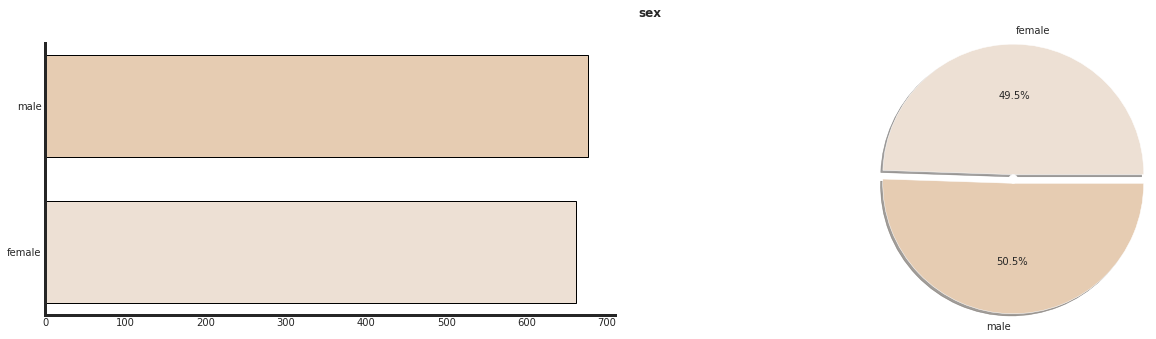

In [29]:
cat_unmariated_analysis("sex")

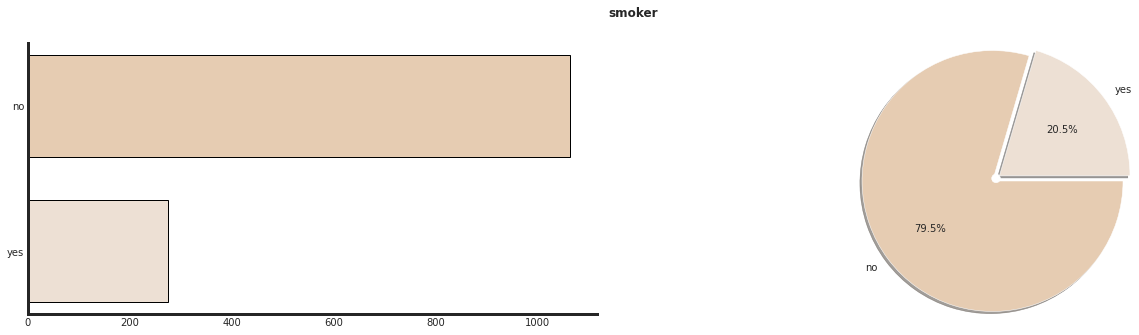

In [30]:
cat_unmariated_analysis("smoker")

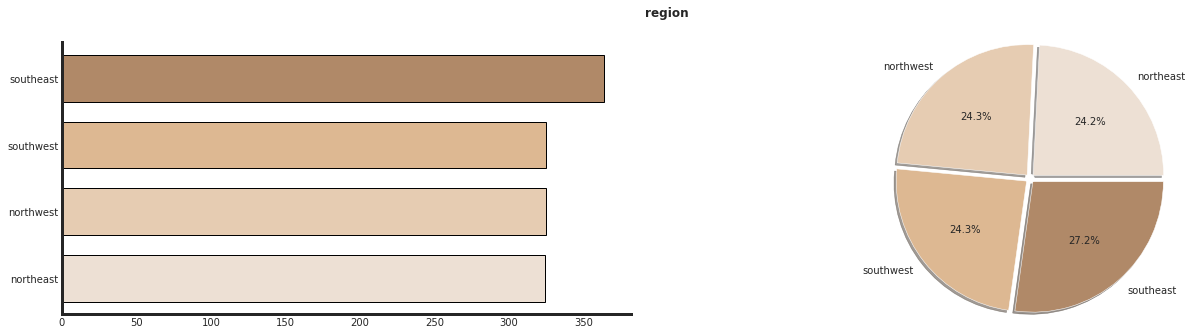

In [31]:
cat_unmariated_analysis("region")

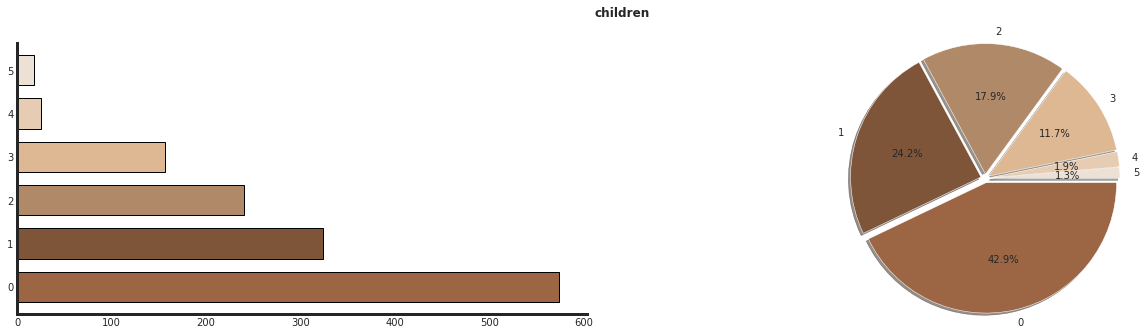

In [32]:
cat_unmariated_analysis("children")

In [33]:
data.replace({'sex':{'male':1,'female':0},'smoker':{'yes':1,'no':0},
              'region':{'southeast':1,'southwest':2,'northeast':3,'northwest':4}},inplace = True)

In [34]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,2,16884.92400
1,18,1,33.770,1,0,1,1725.55230
2,28,1,33.000,3,0,1,4449.46200
3,33,1,22.705,0,0,4,21984.47061
4,32,1,28.880,0,0,4,3866.85520


In [35]:
data.dtypes

age           int64
sex           int64
bmi         float64
children      int64
smoker        int64
region        int64
charges     float64
dtype: object

In [36]:
X = data.drop(columns = ['charges'],axis = 1)

In [37]:
Y = data['charges']

In [39]:
print(X)

      age  sex     bmi  children  smoker  region
0      19    0  27.900         0       1       2
1      18    1  33.770         1       0       1
2      28    1  33.000         3       0       1
3      33    1  22.705         0       0       4
4      32    1  28.880         0       0       4
...   ...  ...     ...       ...     ...     ...
1333   50    1  30.970         3       0       4
1334   18    0  31.920         0       0       3
1335   18    0  36.850         0       0       1
1336   21    0  25.800         0       0       2
1337   61    0  29.070         0       1       4

[1338 rows x 6 columns]


In [40]:
print(Y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


In [41]:
from sklearn.model_selection import train_test_split

In [44]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.1,random_state = 1)

In [45]:
print(X.shape,X_train.shape,X_test.shape)

(1338, 6) (1204, 6) (134, 6)


In [47]:
from sklearn.linear_model import LinearRegression

In [48]:
model = LinearRegression()

In [51]:
model.fit(X_train,Y_train)

LinearRegression()

In [52]:
train_predict = model.predict(X_train)


In [53]:
test_predict = model.predict(X_test)

In [54]:
from sklearn import metrics 

In [56]:
score1 = metrics.r2_score(Y_train,train_predict)

In [57]:
print(score1)

0.7528409543644805


In [58]:
score1_1 = metrics.r2_score(Y_test,test_predict)

In [59]:
score1_1

0.7261586960874369

In [60]:
score2 = metrics.mean_absolute_error(Y_train,train_predict)

In [61]:
print(score2)

4134.319125684198


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


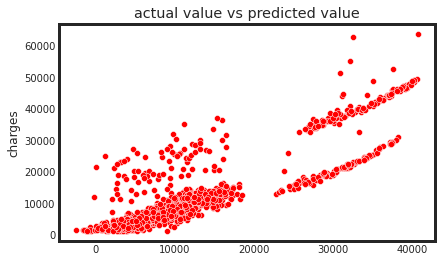

In [82]:
sns.set_style(rc = {'figure.figsize':{15,10}})
sns.scatterplot(train_predict,Y_train,color = "red")
plt.title("actual value vs predicted value")
plt.show()

In [86]:
input_data = [19,0,27.9,0,1,2]
in_array = np.array(input_data)
reshape_data = in_array.reshape(1,-1)
prediction = model.predict(reshape_data)

print("the cost of charges in USD",prediction[0])

the cost of charges in USD 25481.009213365396


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
